In [6]:
import os
import pandas as pd

def concatenate_csv_files(folder_path):
    # 获取文件夹中的所有文件名，并过滤出csv文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # 按照文件名字符串从小到大的顺序排序
    csv_files.sort()

    # 初始化一个空的DataFrame来存储拼接结果
    concatenated_df = pd.DataFrame()

    # 遍历所有排序后的csv文件并拼接
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

    return concatenated_df

# 使用示例
folder_path = r'D:\trg1vr\sumo-rl-main\sumo-rl-main\outputs\l0.0001-normal-untrained'  # 替换为你的文件夹路径
result_df = concatenate_csv_files(folder_path)

# 将结果保存到一个新的csv文件中
result_df.to_csv('outputs\l0.0001-normal-untrained\concatenated_result.csv', index=False)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'D:\trg1vr\sumo-rl-main\sumo-rl-main\outputs\l0.0001-normal-untrained\concatenated_result.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,step,system_total_stopped,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,waiting_times,t_stopped,t_accumulated_waiting_time,t_average_speed,agents_total_stopped,agents_total_accumulated_waiting_time
0,0.0,0,0.0,0.0,0.000000,[],0,0.0,1.000000,0,0.0
1,1.0,0,0.0,0.0,0.000000,[],0,0.0,1.000000,0,0.0
2,2.0,1,0.0,0.0,0.000000,[0.0],1,0.0,0.000000,1,0.0
3,3.0,0,0.0,0.0,1.598341,[0.0],0,0.0,0.105861,0,0.0
4,4.0,1,0.0,0.0,1.621107,"[0.0, 0.0]",1,0.0,0.107369,1,0.0


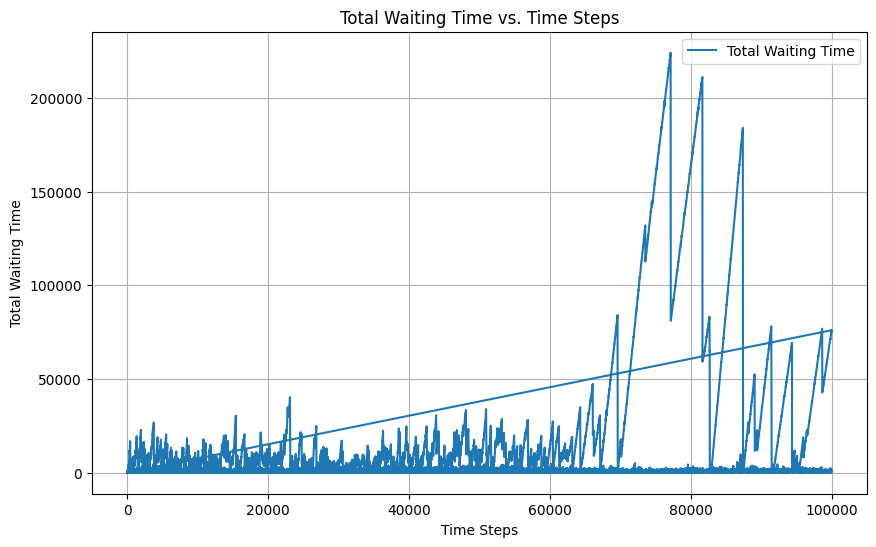

In [10]:
# Extract the relevant columns for plotting
steps = data['step']
total_waiting_time = data['system_total_waiting_time']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, total_waiting_time, label='Total Waiting Time')

# Add labels and title
plt.xlabel('Time Steps')
plt.ylabel('Total Waiting Time')
plt.title('Total Waiting Time vs. Time Steps')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
